In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msn

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('churn_prediction_data/train.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


<AxesSubplot:>

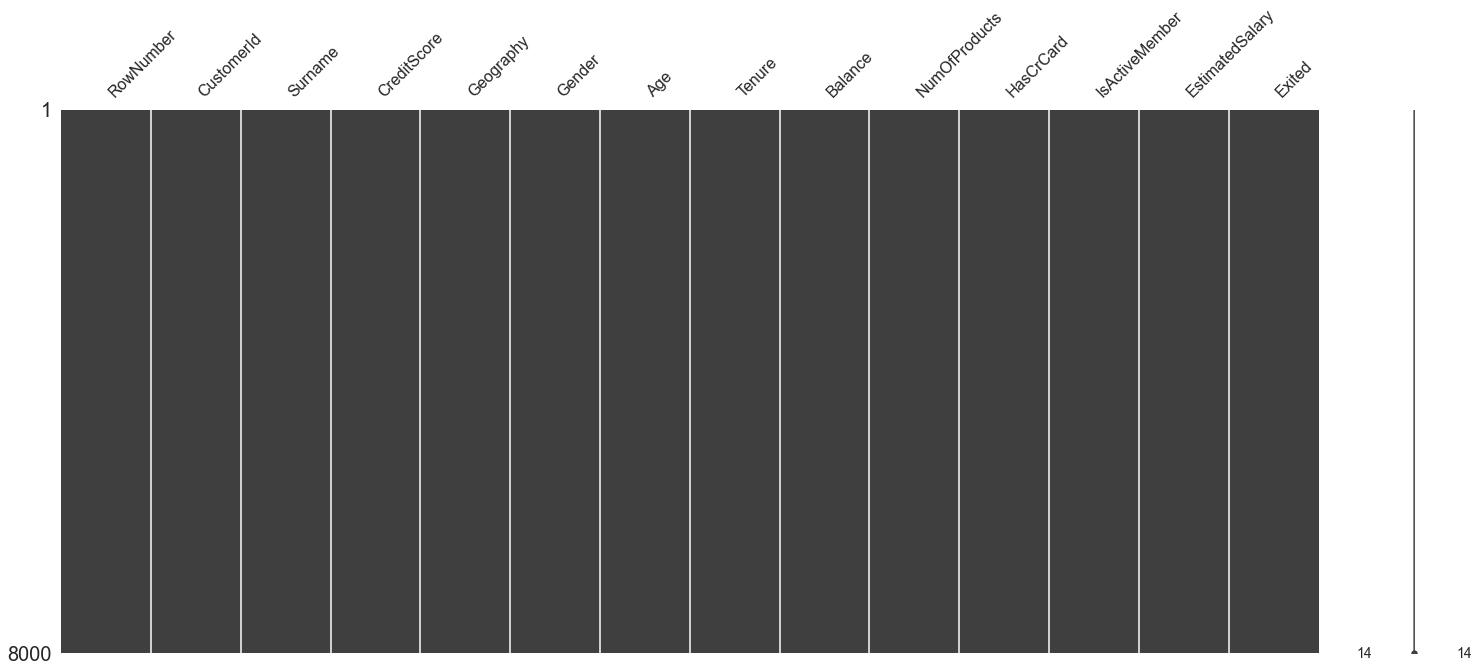

In [33]:
msn.matrix(df)

> having no missing data

In [34]:
df.Exited.unique()

array([0, 1])

> its a binary classification

<AxesSubplot:ylabel='Gender'>

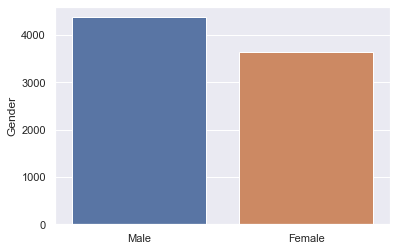

In [35]:
sns.barplot(x=df.Gender.unique(), y=df.Gender.value_counts())

In [36]:
exited_countries = []
for country in df.Geography.unique():
    for status in [0, 1]:
        count = len(df[df.Geography == country][df.Exited == status])
        exited_countries.append((country, status, count))
#exited_countries

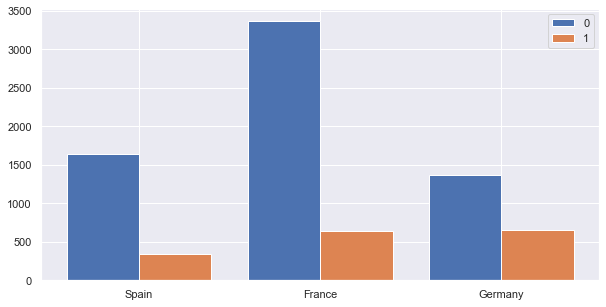

In [46]:
y1 = [i[2] for i in exited_countries[:-1:2]]
y2 = [i[2] for i in exited_countries[1:6:2]]
x = np.arange(3)
width = 0.4
plt.figure(figsize=(10, 5))
plt.xticks(x, ['Spain', 'France', 'Germany'])
plt.bar(x-(width/2), y1, width)
plt.bar(x+(width/2), y2, width)
plt.legend(['0', '1'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Balance'>

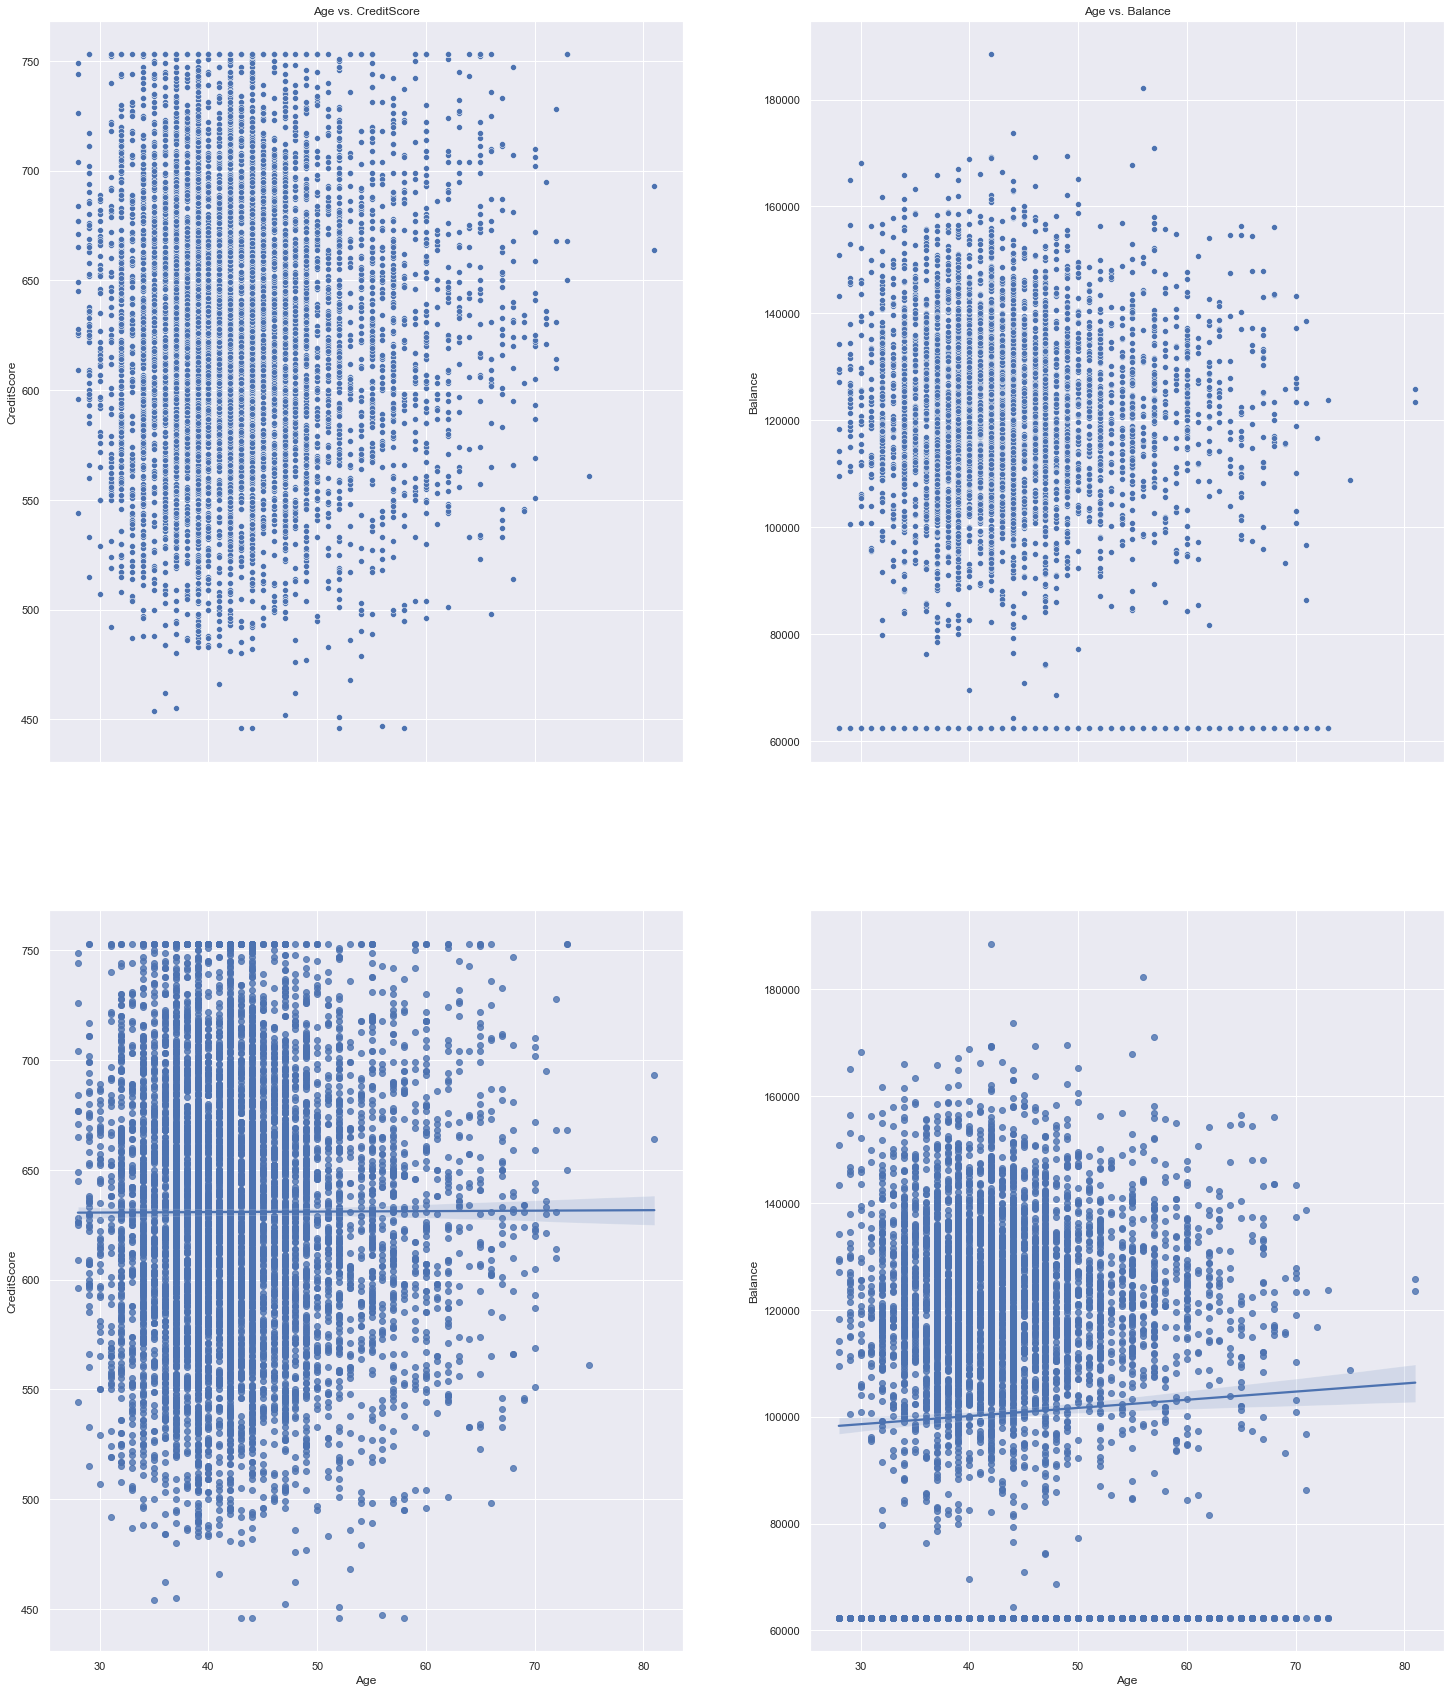

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(25, 30), sharex=True)
#fig.suptitle('')

sns.scatterplot(df.Age, df.CreditScore, ax=axes[0, 0])
axes[0, 0].set_title('Age vs. CreditScore')

sns.scatterplot(df.Age, df.Balance, ax=axes[0, 1])
axes[0, 1].set_title('Age vs. Balance')

sns.regplot(df.Age, df.CreditScore, ax=axes[1, 0])
sns.regplot(df.Age, df.Balance, ax=axes[1, 1])

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

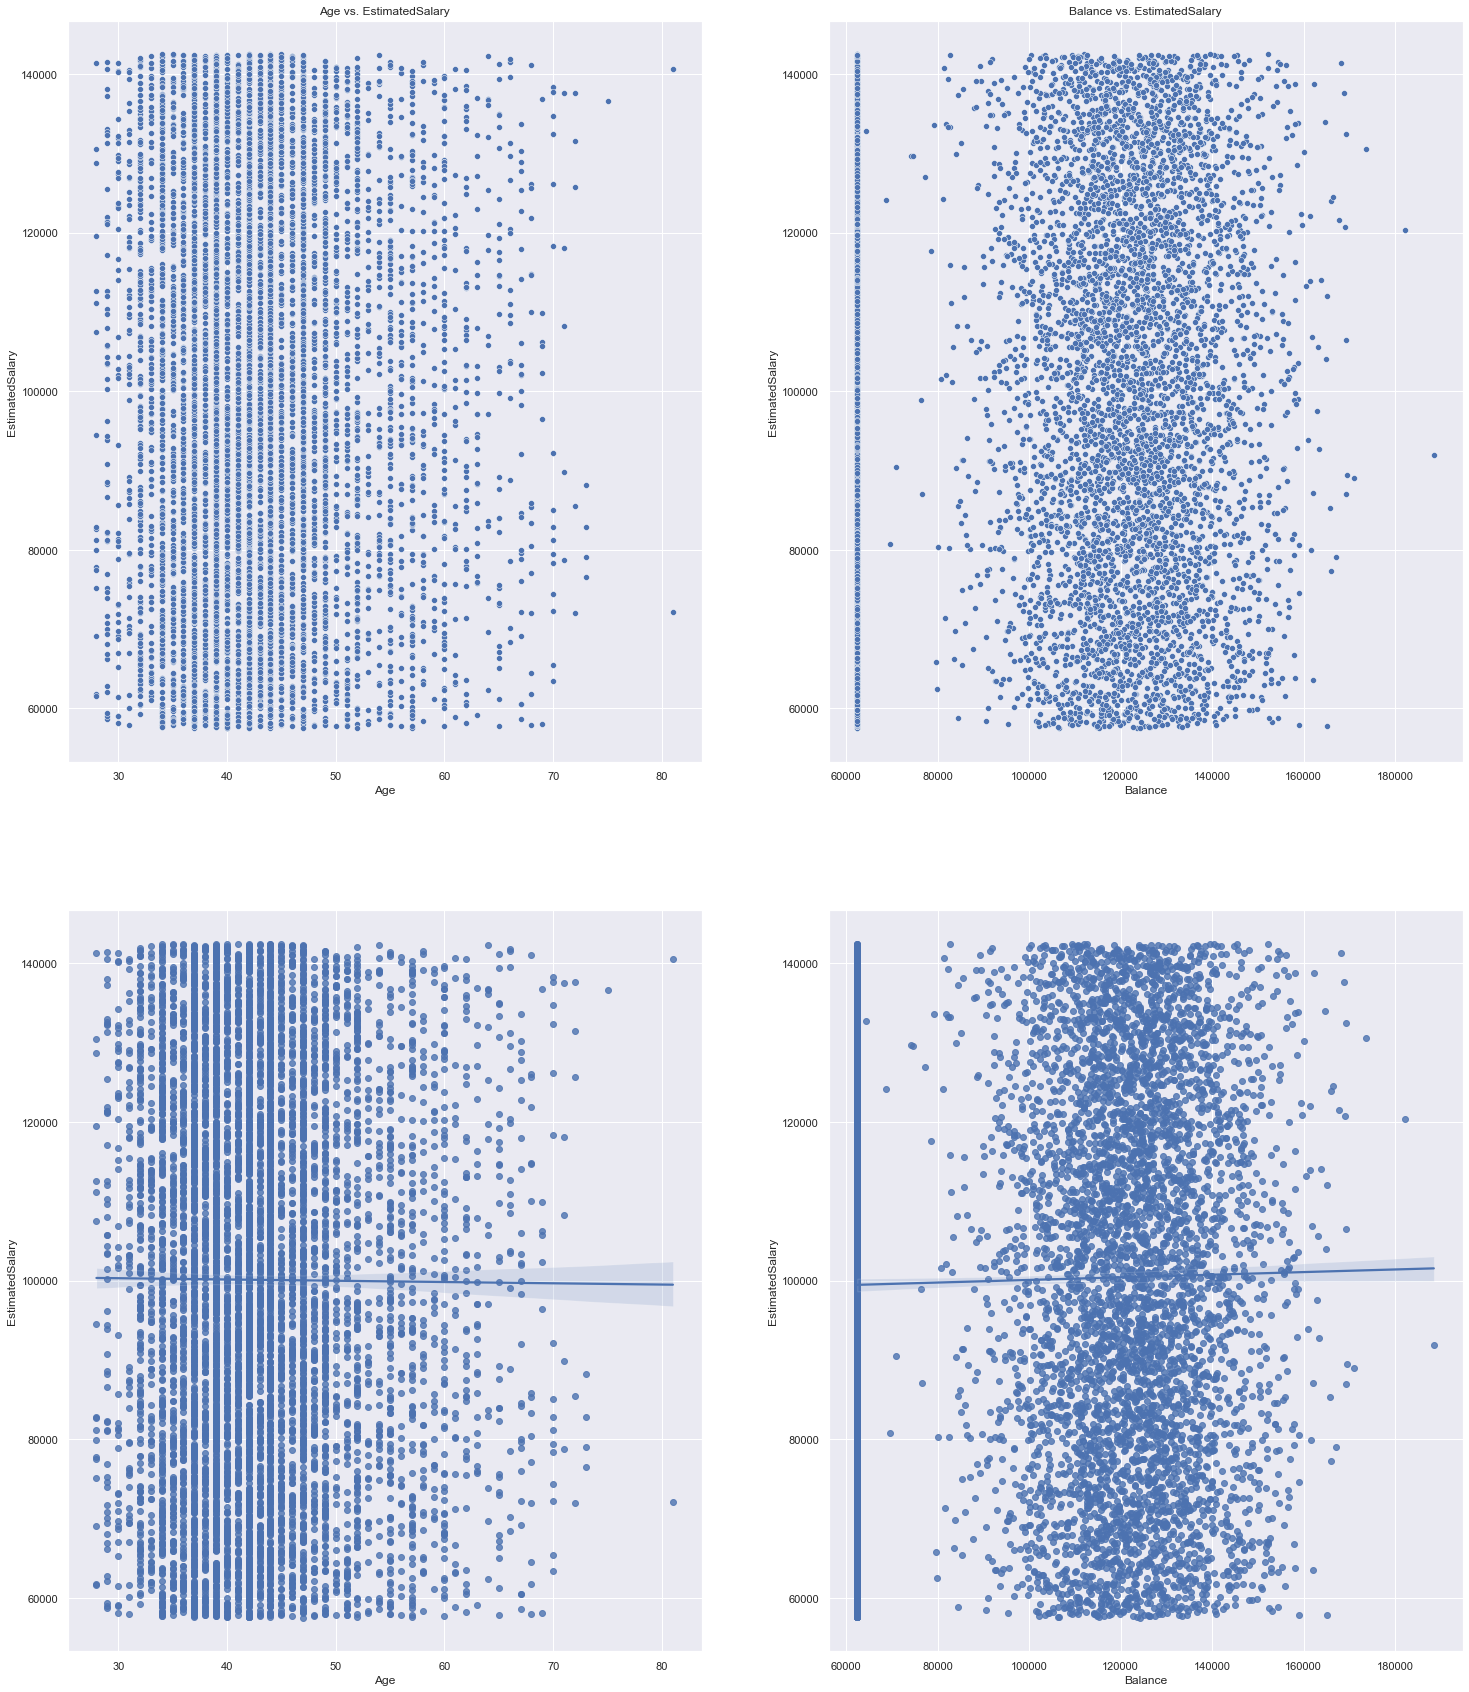

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(25, 30))
#fig.suptitle('')

sns.scatterplot(df.Age, df.EstimatedSalary, ax=axes[0, 0])
axes[0, 0].set_title('Age vs. EstimatedSalary')

sns.scatterplot(df.Balance, df.EstimatedSalary, ax=axes[0, 1])
axes[0, 1].set_title('Balance vs. EstimatedSalary')

sns.regplot(df.Age, df.EstimatedSalary, ax=axes[1, 0])
sns.regplot(df.Balance, df.EstimatedSalary, ax=axes[1, 1])